In [1]:
#  Étape 1 : Charger le dataset Penguins


import pandas as pd
import seaborn as sns

# Charger le dataset "penguins" depuis seaborn
df = sns.load_dataset("penguins")

# Afficher les 5 premières lignes
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [2]:
#  Étape 2 : Comprendre la structure du dataset


# Dimensions du dataset
print("Shape :", df.shape)

# Aperçu des colonnes, types et valeurs nulles
df.info()

# Statistiques descriptives
df.describe(include='all')

# Vérifier les valeurs manquantes
df.isnull().sum()


Shape : (344, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [3]:
#  Étape 3 : Nettoyer les valeurs manquantes


# Supprimer les lignes contenant des valeurs manquantes (option simple pour début)
df = df.dropna()

# Vérifier à nouveau s’il reste des NaN
df.isnull().sum()


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [4]:
#  Étape 4 : Corriger les types de données


# Vérifier les types de chaque colonne
print(df.dtypes)

# Exemple : convertir 'sex' en type catégoriel
df['sex'] = df['sex'].astype('category')
df['island'] = df['island'].astype('category')
df['species'] = df['species'].astype('category')


species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


In [5]:
# 🗑️ Étape 5 : Supprimer la colonne 'year' si elle existe

if 'year' in df.columns:
    df.drop(columns=['year'], inplace=True)


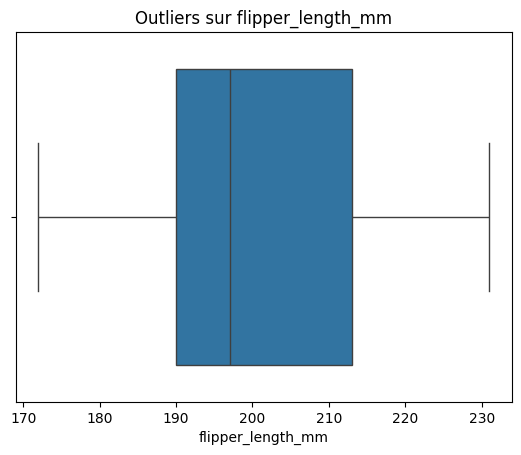

In [6]:
#  Étape 6 : Visualiser et gérer les outliers


import matplotlib.pyplot as plt
import seaborn as sns

# Exemple : boxplot sur flipper_length_mm
sns.boxplot(x=df['flipper_length_mm'])
plt.title("Outliers sur flipper_length_mm")
plt.show()

# (Optionnel) On peut filtrer les valeurs aberrantes si besoin
df = df[df['flipper_length_mm'] < 240]


In [7]:
#  Étape 7 : Encodage des variables catégorielles


# One-hot encoding pour 'island' et 'sex'
df = pd.get_dummies(df, columns=['island', 'sex'], drop_first=True)

# Encodage des labels : convertir 'species' en variable numérique (notre cible)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])  # 0, 1, 2


In [8]:
#  Étape 8 : Normalisation des colonnes numériques


from sklearn.preprocessing import StandardScaler

# Colonnes numériques à normaliser
cols_to_scale = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [9]:
#  Étape 9 : Création d'une nouvelle variable


# Créer une nouvelle variable : rapport taille du bec
df['bill_ratio'] = df['bill_length_mm'] / df['bill_depth_mm']


In [10]:
#  Étape 10 : Finaliser le dataset


# Aperçu final des données prêtes
df.head()

# Séparer X (features) et y (label)
X = df.drop("species", axis=1)
y = df["species"]
